In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#path for the datset file 
path_data = "Dataset/cities.csv"
# reading csv file 
data = pd.read_csv(path_data)
data.head(5)

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [3]:
#extracting top 25 cities in terms of population
top_25_populated_city =  data.sort('population_total', ascending=False).head(25)[["name_of_city","population_total",
                                                                                 "population_male","population_female"]]
top_25_populated_city.head(5)

,name_of_city,population_total,population_male,population_female
185,Greater Mumbai,12478447,6736815,5741632
141,Delhi,11007835,5871362,5136473
72,Bengaluru,8425970,4401299,4024671
184,Greater Hyderabad,6809970,3500802,3309168
7,Ahmadabad,5570585,2935869,2634716


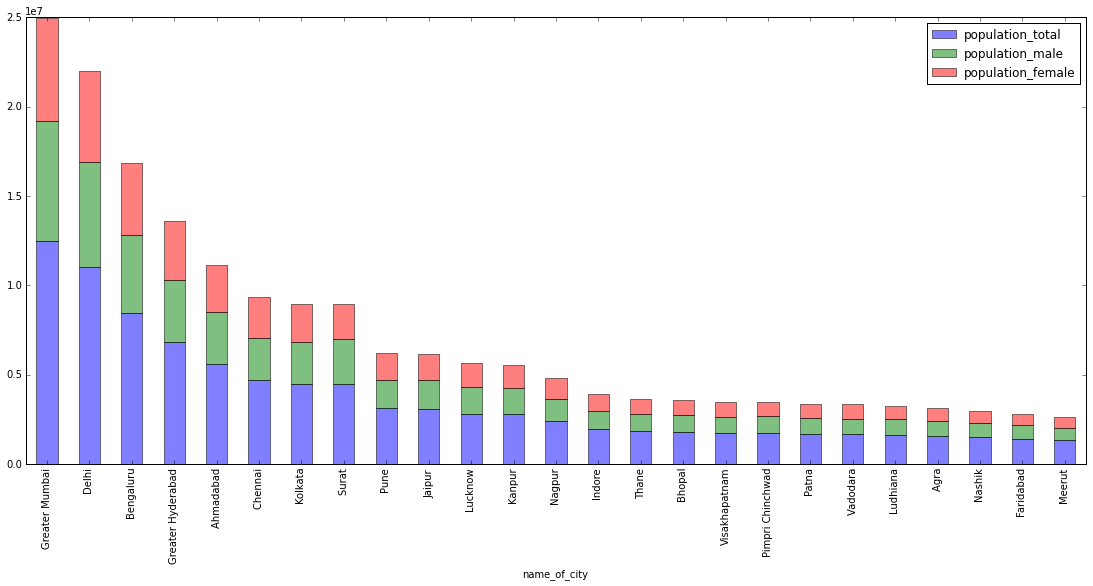

In [4]:
#plot a bar chart for the city name and population (y lim - 1.3 * 10^7) 
top_25_populated_city.plot(x = top_25_populated_city["name_of_city"],
                           kind='bar', figsize=[19, 8], width=0.5,
                           alpha=0.5, #color='r', edgecolor='k',
                           stacked = True,
                           grid=False)

In [5]:
top_25_0_6_age_populated_city =  data.sort('population_total', ascending=False).head(25)[["name_of_city",
                                                                                  "0-6_population_total",
                                                                                 "0-6_population_male",
                                                                                  "0-6_population_female"]]
top_25_0_6_age_populated_city.head(5)

,name_of_city,0-6_population_total,0-6_population_male,0-6_population_female
185,Greater Mumbai,1139146,599007,540139
141,Delhi,1209275,647938,561337
72,Bengaluru,862493,444639,417854
184,Greater Hyderabad,725816,373794,352022
7,Ahmadabad,589076,317917,271159


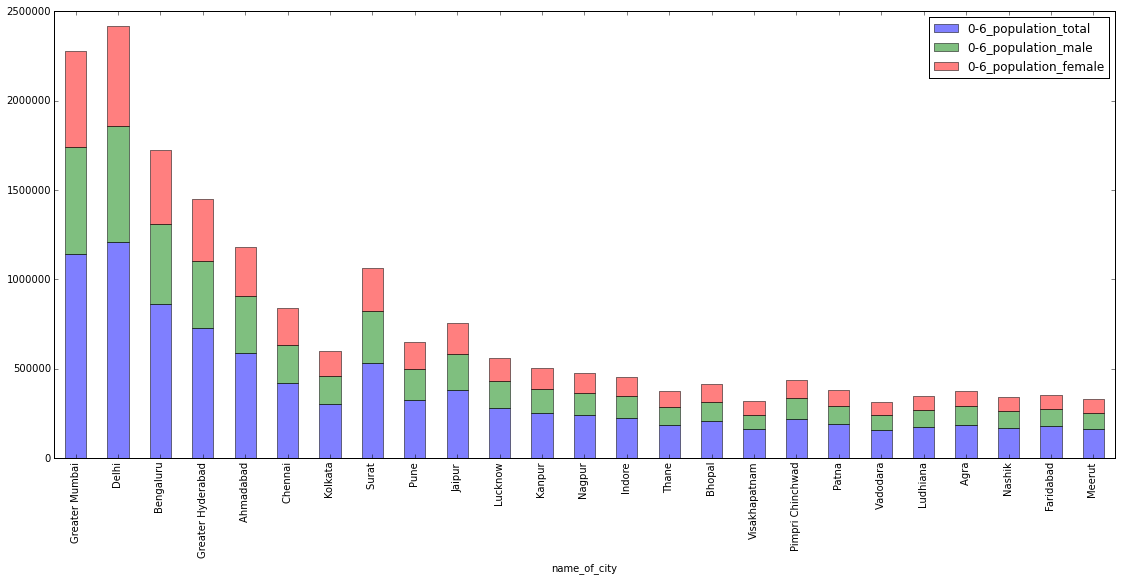

In [6]:
top_25_0_6_age_populated_city.plot(x = top_25_populated_city["name_of_city"],
                           kind='bar', figsize=[19, 8], width=0.5,
                           alpha=0.5, #color='r', edgecolor='k',
                           stacked = True,
                           grid=False)

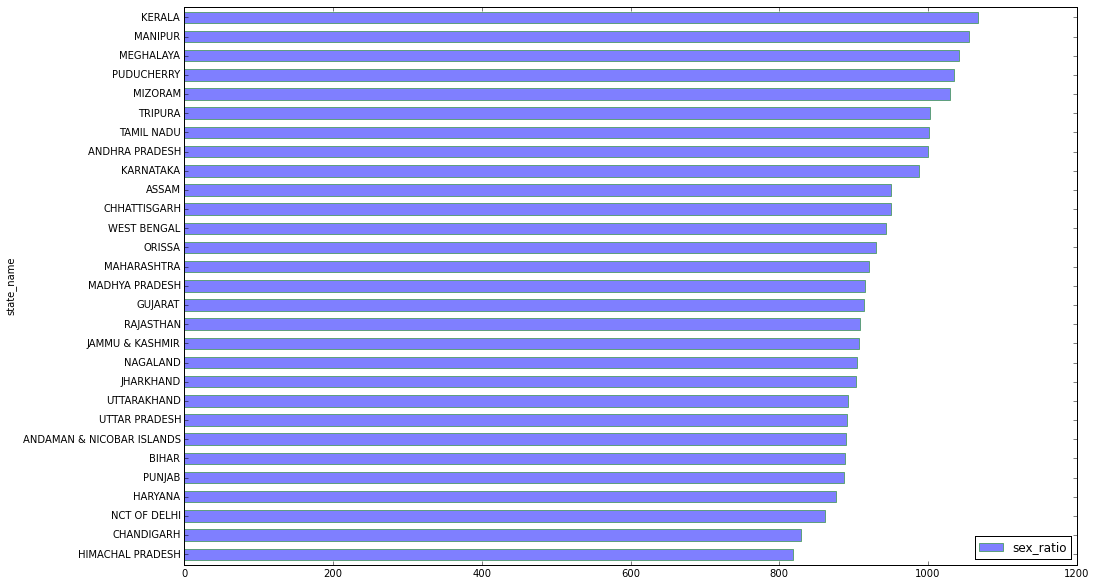

In [7]:
state_sex_ratio = data[["state_name","sex_ratio"]].groupby("state_name").agg({"sex_ratio":np.average}).sort("sex_ratio")
state_sex_ratio.plot(kind="barh",
                      grid=False,
                      figsize=(16,10),
                      color="b",
                      alpha = 0.5,
                      width=0.6,
                     edgecolor="g",)

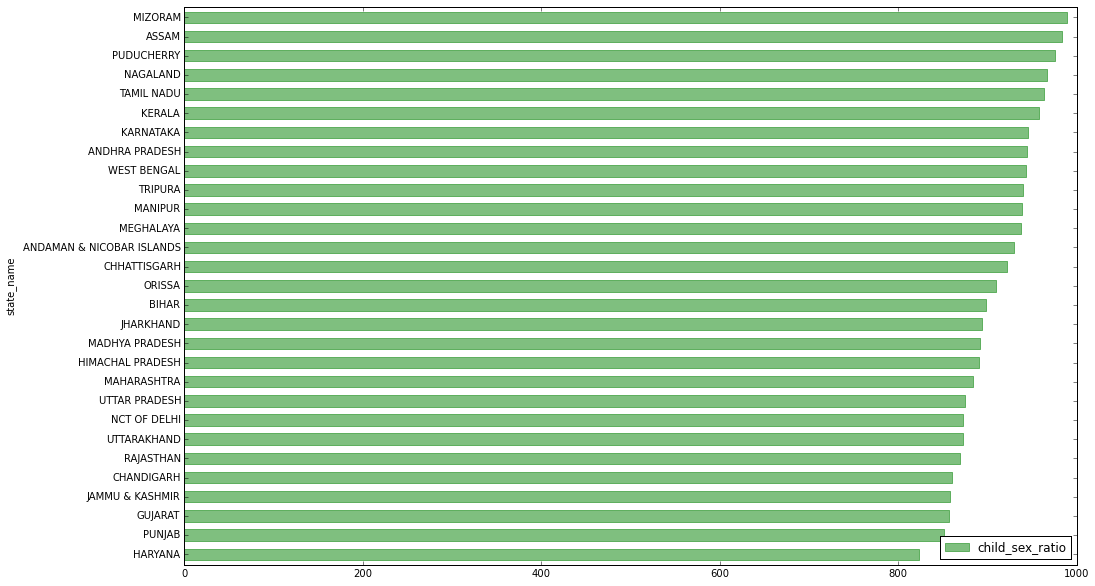

In [8]:
state_sex_ratio = data[["state_name","child_sex_ratio"]].groupby("state_name").agg({"child_sex_ratio":np.average}).sort("child_sex_ratio")
state_sex_ratio.plot(kind="barh",
                      grid=False,
                      figsize=(16,10),
                      color="g",
                      alpha = 0.5,
                      width=0.6,
                     edgecolor="g",)

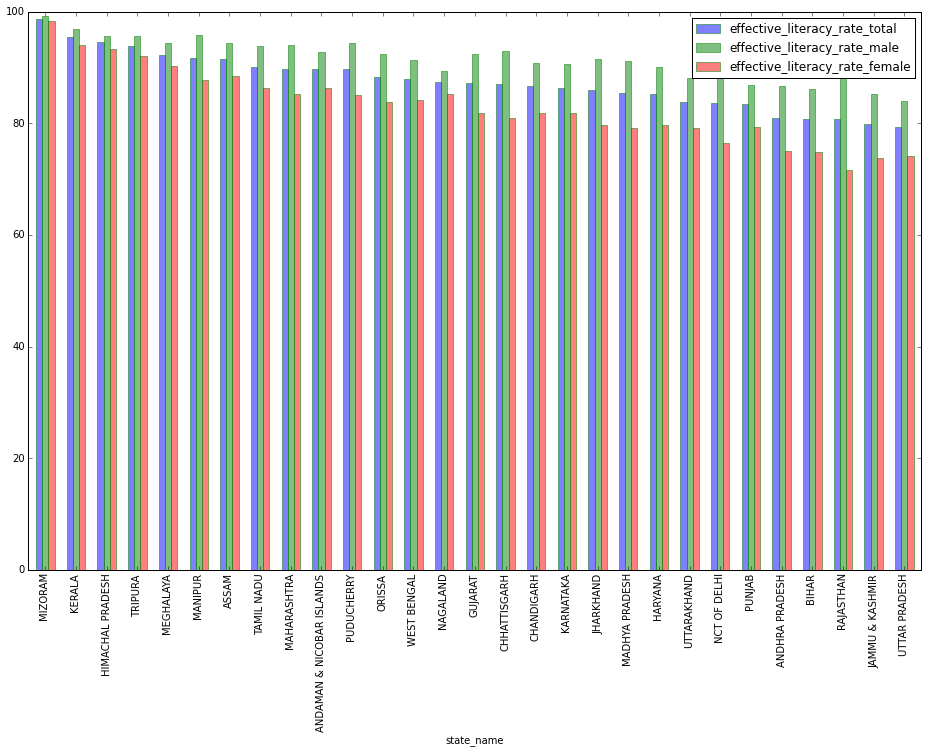

In [9]:
state_literacy_effective  = data[["state_name",
                                  "effective_literacy_rate_total",
                                  "effective_literacy_rate_male",
                                  "effective_literacy_rate_female"]].groupby("state_name").agg({"effective_literacy_rate_total":np.average,
                                                                                                "effective_literacy_rate_male":np.average,
                                                                                                "effective_literacy_rate_female":np.average}).sort("effective_literacy_rate_total", ascending=False)
state_literacy_effective.plot(kind="bar",
                      grid=False,
                      figsize=(16,10),
                      #color="r",
                      alpha = 0.5,
                      width=0.6,
                      stacked = False,
                     edgecolor="g",)

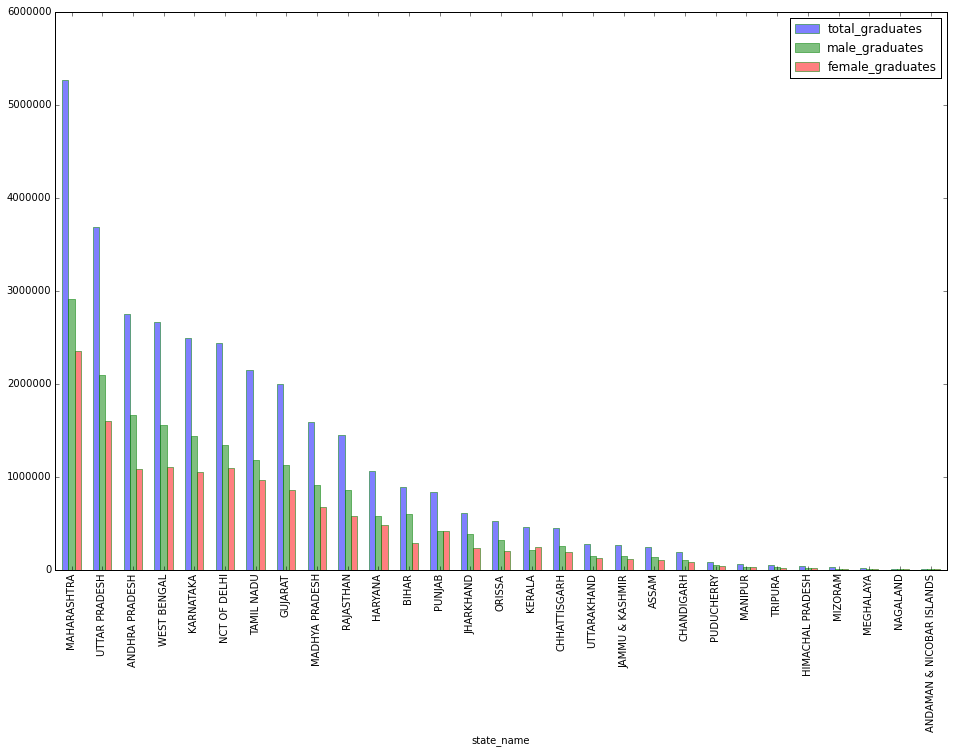

In [13]:
state_graduate  = data[["state_name",
                                  "total_graduates",
                                  "male_graduates",
                                  "female_graduates"]].groupby("state_name").agg({"total_graduates":np.sum,
                                                                                "male_graduates":np.sum,
                                                                                "female_graduates":np.sum}).sort("total_graduates", ascending=False)
state_graduate.plot(kind="bar",
                      grid=False,
                      figsize=(16,10),
                      #color="r",
                      alpha = 0.5,
                      width=0.6,
                      stacked = False,
                     edgecolor="g",)